### Estimate Horizontal Speed, for various types of throws
 
In the video in data/misc/speed_estimate/nov_throw/output1.avi, we throw the ball at various speed from a very slow lob, to very hard.
 
Using markers placed in the room, and the timelog entries, we calc
distance and time, thus speed.

Below we highlight the best frame for the "start" and "end" of each throw, but they are not exact so we use a fraction of the frame's time or a fraction of the marked distance to represent without a perfect frame.

See experimental_setup.txt in that directory for full details.

Conclusions:

Ball roughly proceeds horizontally at 10-30 ft/sec
(That's XX feet/sec, XX kph)

 - Arcing Lob:       10     ft/sec
 - Casual Log:       16-20  ft/sec
 - Fastest Possible: 30     ft/sec

Caveats:
 - we're not accounting for air-friction deceleration
 - timelogs may be 1-off for the frame.
 

In [59]:
import os, sys, copy, random, pickle, cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append("../")

%load_ext autoreload
%autoreload 2

from modules.ControlDisplay import Display
from modules.Interproc import DBInterface, GuiviewState

from modules.AnalysisHelpers import (cvtPlot,
         croppedPic, roiSelectZoomWindow, roiSelectScoreWindow, 
         exploreImgs, multiPlot)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
db_name = "../data/misc/books/speed-estimate-1/throw_starts_stops.db"
db = DBInterface(db_name)
listGS = [ pickle.loads(d[1]) for d in db.selectAll()]
[gs.frameCounter for gs in listGS]

[309, 364, 421, 490, 582, 292, 349, 409, 479, 557]

In [61]:
display = Display()
imgs = []

for gs in listGS:
    
    _rectMain = gs.zoomRect
    _rectMain = map(int, _rectMain)
    
    _img = gs.getOrigFrame()
    
    display.setFrame(_img)
    display.alterFrame()
    _rect = display.rectMainToOrig(_rectMain)
    
    x, y, dx, dy = _rect
    x0, y0 = x, y
    x1, y1 = x + dx, y + dy
    
    _zoomImg = _img[y0:y1, x0:x1, :]

    imgs.append(_zoomImg.copy())

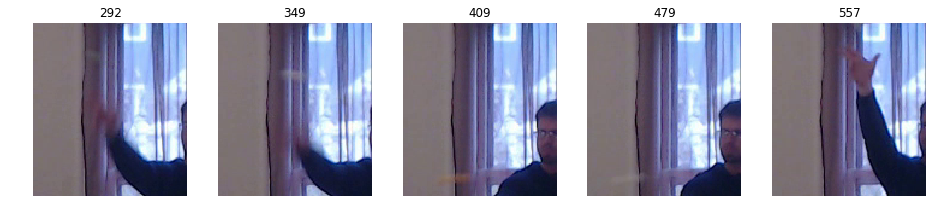

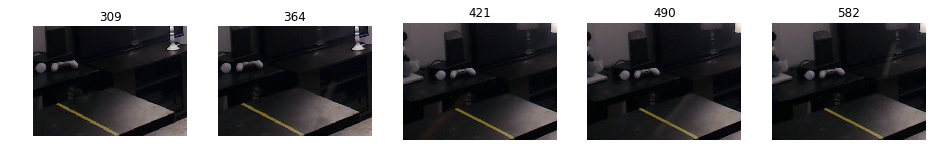

In [62]:
for start,stop in [(5,10),(0,5)]:
    chart_data = copy.deepcopy(imgs[start:stop])
    chart_data = [[x] for x in chart_data]
    titles = [gs.frameCounter for gs in listGS][start:stop]
    figsize = (16,4)

    multiPlot( chart_data, hspace = 0, wspace = 0.2, figsize = figsize
                  ,input_frame_titles =   titles
                  ,bForceTitles = False
                  ,bGrid=False)